In [1]:
import cv2
import os
import tensorboard
import tensorflow as tf
import keras
from tqdm import tqdm
import numpy as np
from random import shuffle
import time
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [ ]:
tf.__version__

In [ ]:
tf.config.list_physical_devices('GPU')

In [2]:
OUTPUT_PATH = './Result_hockey/'
IMG_SIZE = 100
def extract_frames(folder):
    c = 0
    for folders in os.listdir(folder):
        print(folders)
        folder_path = os.path.join(folder, folders)
        for files in tqdm(os.listdir(folder_path)):
            path = os.path.join(folder_path, files)
            cap = cv2.VideoCapture(path)
            success = True
            while success:
                success, image = cap.read()
                if not success:
                    break
                    
                cv2.resize(cv2.imwrite(OUTPUT_PATH + str(c) + '.jpg', image),(IMG_SIZE, IMG_SIZE))
                c += 1
        print(c)
        print('DONE: ' + folders)

In [ ]:
extract_frames('./movies_fight/')

In [ ]:
extract_frames('./Hockey_fight/')

In [9]:
OPTIM = 'SGD'
LR = 0.01
decay = 1e-6
EPOCHS = 25
BATCH_SIZE=5
LOSS = 'categorical_crossentropy'
NUM_FRAMES = 10

In [10]:
def create_dataset():
    dataset = []
    images = []
    limit = 0
    count = 0
    
    for frames in tqdm(os.listdir('./Result_hockey/')):
        path = os.path.join('./Result_hockey/',frames)
        img = cv2.resize(cv2.imread(path),(IMG_SIZE,IMG_SIZE))
        #img = np.array(img,dtype = 'float32')/255
        images.append(np.array(img))
        limit += 1
        count += 1
        if limit == NUM_FRAMES:
            limit = 0
            if(count<20499):
                dataset.append(np.array([images, np.array([0, 1])]))
            else:
                dataset.append(np.array([images, np.array([1, 0])]))
            images = []
    shuffle(dataset)
    np.save('dataset_hockey.npy',dataset)
    return dataset

In [ ]:
test_data = create_dataset()

In [11]:
data = create_dataset()

  0%|                                                                                        | 0/41056 [00:00<?, ?it/s]<ipython-input-10-1f5d7af27503>:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dataset.append(np.array([images, np.array([0, 1])]))
 50%|█████████████████████████████████████▍                                     | 20464/41056 [00:42<00:43, 478.45it/s]<ipython-input-10-1f5d7af27503>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  dataset.append(np.array([images, np.array([1, 0])]))
100%|█████████████████████████████████████████████

In [3]:
#Model creation
from tensorflow.keras.layers import LSTM, Bidirectional, Conv2D, Dense, Flatten, MaxPooling2D, TimeDistributed, Reshape, MaxPooling3D,GRU
from tensorflow.keras.models import Sequential

In [9]:

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu',input_shape=(10,IMG_SIZE,IMG_SIZE,3),padding='same'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling3D((1,2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling3D((1,2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling3D((1,2,2)))
#model.summary()
model.add(Reshape((10, 6400)))

lstm_fw = LSTM(units = 32)
lstm_bw = LSTM(units = 32, go_backwards = True)

model.add(Bidirectional(lstm_fw,backward_layer = lstm_bw))

#Dense layers

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 100, 100, 64)  1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 98, 98, 64)    36928     
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 10, 49, 49, 64)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 47, 47, 64)    36928     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 10, 23, 23, 64)    0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 21, 21, 64)    36928     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 10, 10, 10, 64)    0

In [8]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu',input_shape=(10,IMG_SIZE,IMG_SIZE,3),padding='same'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling3D((1,2,2)))
tf.keras.layers.BatchNormalization()
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling3D((1,2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling3D((1,2,2)))
#model.summary()
model.add(Reshape((10, 6400)))

#lstm_fw = LSTM(units = 32)
#lstm_bw = LSTM(units = 32, go_backwards = True)
#gru = tf.keras.layers.GRU(64)
#model.add(Bidirectional(lstm_fw,backward_layer = lstm_bw))
model.add(GRU(units = 64))
#Dense layers

model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 10, 100, 100, 64)  1792      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 98, 98, 64)    36928     
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 10, 49, 49, 64)    0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 47, 47, 64)    36928     
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 10, 23, 23, 64)    0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 21, 21, 64)    36928     
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 10, 10, 10, 64)   

In [ ]:
data = np.load('dataset_hockey.npy',allow_pickle = True)

In [ ]:
test_data = np.load('dataset_movie.npy',allow_pickle = True)

In [12]:
train, test = train_test_split(data, train_size = 0.9, shuffle = True)

In [ ]:
print(len(train))
print(len(test))

In [ ]:
X_test = np.array([i[0] for i in test_data]).reshape(-1,10,IMG_SIZE,IMG_SIZE,3)
Y_test = np.array([i[1] for i in test_data])

In [31]:
X.nbytes

1108200000

In [30]:
(1108200000/(1024))/1024

1056.8618774414062

In [24]:
X = X.astype('float')/255
x_valid = x_valid.astype('float')/255

MemoryError: Unable to allocate 8.26 GiB for an array with shape (3694, 10, 100, 100, 3) and data type float64

In [13]:
X = np.array([i[0] for i in train]).reshape(-1, 10, IMG_SIZE, IMG_SIZE, 3)
Y = np.array([i[1] for i in train])
x_valid = np.array([i[0] for i in test]).reshape(-1, 10, IMG_SIZE, IMG_SIZE, 3)
y_valid = np.array([i[1] for i in test])

In [ ]:
X.shape

In [ ]:
print(X_test.shape)
print(Y_test.shape)

In [21]:
opt = keras.optimizers.SGD(learning_rate = LR)
model.compile(loss = LOSS, optimizer = opt, metrics = ['accuracy'])
NAME = 'CNN-BiLSTM-{}'.format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

In [22]:
#OPTIM = 'SGD'
#LR = 0.01
# decay = 1e-6
# EPOCHS = 25
# BATCH_SIZE=5
# LOSS = 'categorical_crossentropy'
# NUM_FRAMES = 10

In [32]:
model.fit(X,Y,epochs = EPOCHS,validation_data = (x_valid,y_valid), batch_size = BATCH_SIZE, verbose = 1, callbacks = [tensorboard])

Epoch 1/25
739/739 [==============================] - 110s 149ms/step - loss: 0.6946 - accuracy: 0.4940 - val_loss: 0.6935 - val_accuracy: 0.4745
Epoch 2/25
739/739 [==============================] - 108s 146ms/step - loss: 0.6942 - accuracy: 0.5008 - val_loss: 0.6960 - val_accuracy: 0.4745
Epoch 3/25
739/739 [==============================] - 112s 151ms/step - loss: 0.6943 - accuracy: 0.4930 - val_loss: 0.6948 - val_accuracy: 0.4745
Epoch 4/25
675/739 [==========================>...] - ETA: 9s - loss: 0.6944 - accuracy: 0.4895

KeyboardInterrupt: 

In [7]:
model.save('GRU.h5')

In [ ]:
model = tf.keras.models.load_model('my_model.h5')

In [ ]:
model.summary()

In [ ]:
print(X.shape,Y.shape)

In [ ]:
model.evaluate(x_valid,y_valid,batch_size = 5,verbose = 1)

In [ ]:
model.evaluate(X_test,Y_test,batch_size = 5,verbose = 1)

In [9]:
a = [0.599,0.6245,0.6811,0.7718,0.8519,0.8928,0.9161,0.9329,0.9478,0.9559,0.9662,0.9748,0.9859,0.9789,0.9921,0.959,0.9954,0.9870,0.935,0.9984,0.9997,0.9997,1,1,1]

In [12]:
epoch = [i for i in range(25)]

Text(0, 0.5, 'accuracy')

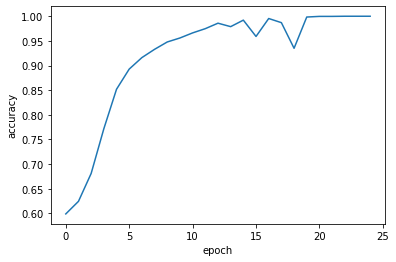

In [15]:
plt.plot(epoch,a)
plt.xlabel('epoch')
plt.ylabel('accuracy')  